# Loan Prediction - Classification

<img src=https://wpblogassets.paytm.com/paytmblog/uploads/2023/08/Blog_Paytm_Benefits-of-Loan-Against-Fixed-Deposit.jpg width="700">

### Kredi Risk Tahmin Projesi

Bu proje, bir finans kurumunun talebi doğrultusunda geliştirilmiştir.  
Şirket yönetimi, kredi başvurularında **temerrüde düşme ihtimali düşük olan müşterileri önceden belirlemek** istemektedir.  

Bu kapsamda şunlar talep edilmiştir:
- Müşterilerin geçmiş finansal verilerine dayanarak **iyi müşteri** olup olmayacağını tahmin eden bir makine öğrenmesi modeli geliştirmek
- Bu modelin sonuçlarını kullanarak, kredi başvurusu sırasında müşterilere yöneltilecek **hedefli sorular** belirlemek


### Veri Sözlüğü (Data Dictionary)

- **Loan ID**: Kredinin benzersiz kimliği (ID)
- **Customer ID**: Müşterinin benzersiz kimliği (ID). Bir müşteri birden fazla krediye sahip olabilir.
- **Loan Status**: Kredinin ödenip ödenmediğini gösteren kategorik değişken (paid / defaulted)
- **Current Loan Amount**: Ödenmiş ya da temerrüde düşmüş kredi miktarı
- **Term**: Kredinin vadesi (short term / long term)
- **Credit Score**: 0–800 arasında, müşterinin kredi risk puanı
- **Years in current job**: Müşterinin mevcut işinde kaç yıldır çalıştığı
- **Home Ownership**: Ev sahipliği durumu (Rent / Home Mortgage / Own)
- **Annual Income**: Müşterinin yıllık geliri
- **Purpose**: Kredinin kullanım amacı
- **Monthly Debt**: Mevcut kredilere ait aylık borç ödemesi
- **Years of Credit History**: Kredi geçmişinin süresi (yıl)
- **Months since last delinquent**: Son gecikmeden bu yana geçen ay sayısı
- **Number of Open Accounts**: Açık kredi hesabı/kartı sayısı
- **Number of Credit Problems**: Kredi sorunları sayısı
- **Current Credit Balance**: Mevcut toplam borç miktarı
- **Maximum Open Credit**: Maksimum toplam kredi limiti
- **Bankruptcies**: İflas sayısı
- **Tax Liens**: Vergi haczi sayısı

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("LoansTrainingSet.csv", low_memory=False)

In [3]:
df.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0


In [4]:
df.tail(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [5]:
df.shape

(256984, 19)

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [8]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [9]:
df.isnull().sum() #boş değer kontrolu ve boş değerleri uygun olan matematiksel işlemle doldurma

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

## Veri Hazırlama (Data Preparation)

- Keşifsel veri analizi ile (EDA) tespit edilen sorunlar düzeltildi.  
- Eksik veriler belirlendi ve uygun yöntemlerle dolduruldu veya çıkarıldı.  
- Yazım hataları, biçim farklılıkları ve yinelenen satırlar temizlendi.  
- Sayısal değişkenler ölçeklendirildi / standartlaştırıldı.  
Veriyi temizleyerek model için uygun hale getirildi.

In [10]:
df['Credit Score'].value_counts()

Credit Score
747.0     5669
740.0     5537
741.0     5499
746.0     5486
742.0     5219
          ... 
5850.0       3
5910.0       3
6070.0       3
5930.0       2
5860.0       1
Name: count, Length: 334, dtype: int64

In [11]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

In [12]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [13]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [14]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

In [15]:
df['Tax Liens'] = df['Tax Liens'].fillna(0)

In [16]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

In [17]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job            11476
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [18]:
df['Years in current job'] = df['Years in current job'].fillna('Unknown')

In [19]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
num_cols = df.select_dtypes(include=[np.number]).columns #outliner olabilecek sayısal değerleri görsellerle outliner analizi yaparak düzeltme

In [21]:
df[num_cols].head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0
1,3441,734.0,42269.0,26.3,0.0,17,0,6262,0.0,0.0
2,21029,747.0,90126.0,28.8,0.0,5,0,20967,0.0,0.0
3,18743,747.0,38072.0,26.2,0.0,9,0,22529,0.0,0.0
4,11731,746.0,50025.0,11.5,0.0,12,0,17391,0.0,0.0


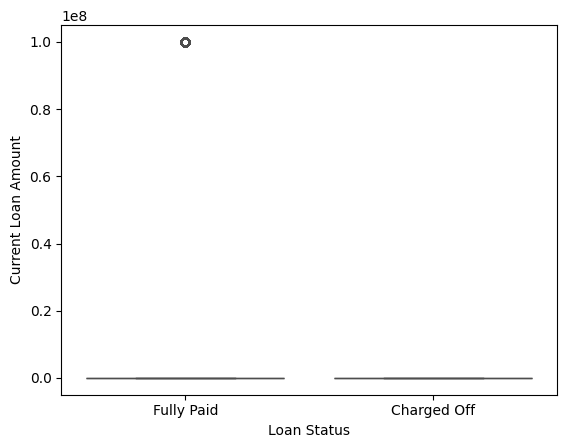

In [22]:
sns.boxplot(x='Loan Status', y='Current Loan Amount', data=df, color='red')
plt.show()

In [23]:
df['Current Loan Amount'].describe()

count    2.569840e+05
mean     1.371331e+07
std      3.438131e+07
min      5.050000e+02
25%      8.299000e+03
50%      1.429800e+04
75%      2.436700e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

In [24]:
df = df[(df['Current Loan Amount'] < 500000) | (df['Current Loan Amount'].isna())]

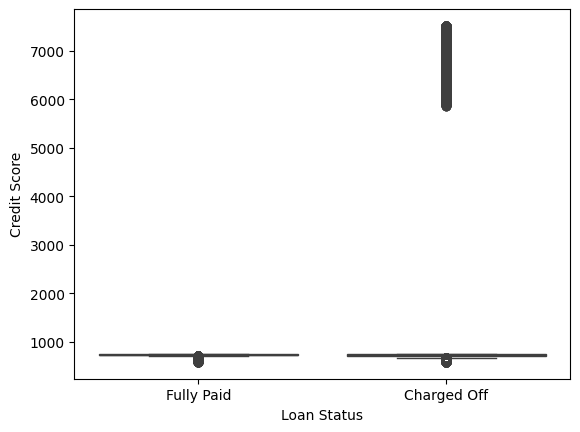

In [25]:
sns.boxplot(x='Loan Status', y='Credit Score', data=df)
plt.show()

In [26]:
df['Credit Score'].describe()

count    221774.000000
mean       1190.388165
std        1661.714782
min         585.000000
25%         723.000000
50%         733.000000
75%         740.000000
max        7510.000000
Name: Credit Score, dtype: float64

In [27]:
df = df[(df['Credit Score'] < 1000) | (df['Credit Score'].isna())]

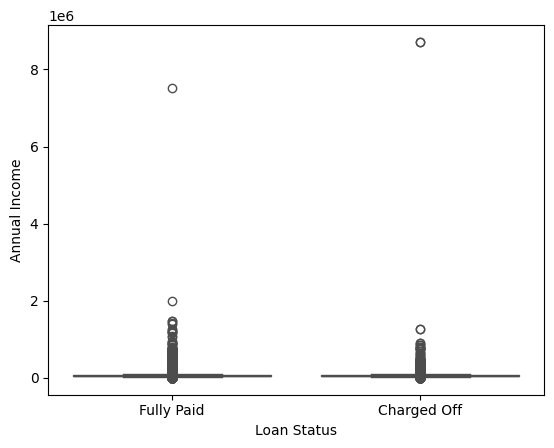

In [28]:
sns.boxplot(x='Loan Status', y='Annual Income', data=df, color='red')
plt.show()

In [29]:
df['Annual Income'].describe()

count    2.055870e+05
mean     6.873104e+04
std      5.055087e+04
min      0.000000e+00
25%      5.104000e+04
50%      6.124200e+04
75%      7.410800e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [30]:
df = df[(df['Annual Income'] < 500000) | (df['Annual Income'].isna())]

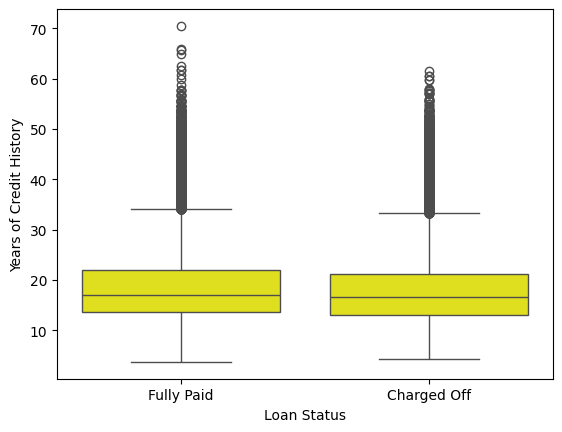

In [31]:
sns.boxplot(x='Loan Status', y='Years of Credit History', data=df, color='yellow')
plt.show()

In [32]:
df['Years of Credit History'].describe()

count    205466.000000
mean         18.269598
std           7.062739
min           3.700000
25%          13.500000
50%          17.000000
75%          21.700000
max          70.500000
Name: Years of Credit History, dtype: float64

In [33]:
df = df[(df['Years of Credit History'] < 60) | (df['Years of Credit History'].isna())]

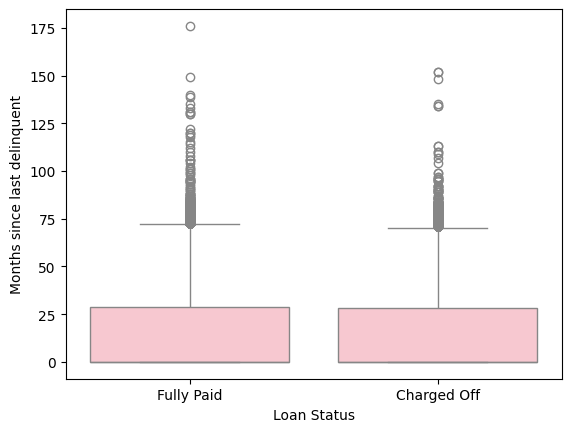

In [34]:
sns.boxplot(x='Loan Status', y='Months since last delinquent', data=df, color='pink')
plt.show()

In [35]:
df['Months since last delinquent'].describe()

count    205455.000000
mean         15.855238
std          22.787000
min           0.000000
25%           0.000000
50%           0.000000
75%          29.000000
max         176.000000
Name: Months since last delinquent, dtype: float64

In [36]:
df = df[(df['Months since last delinquent'] < 120) | (df['Months since last delinquent'].isna())]

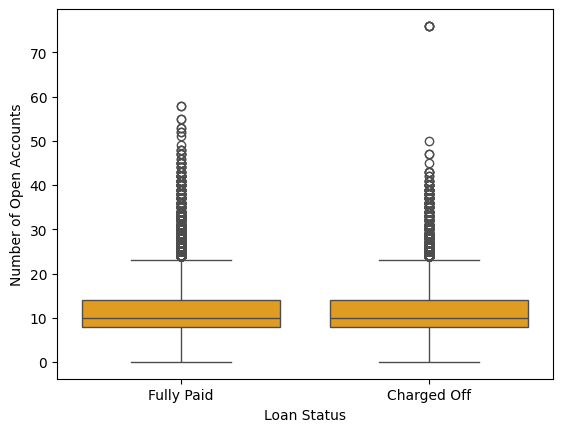

In [37]:
sns.boxplot(x='Loan Status', y='Number of Open Accounts', data=df, color='orange')
plt.show()

In [38]:
df['Number of Open Accounts'].describe()

count    205436.000000
mean         11.100284
std           4.981547
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Number of Open Accounts, dtype: float64

In [39]:
df = df[(df['Number of Open Accounts'] < 50) | (df['Number of Open Accounts'].isna())]

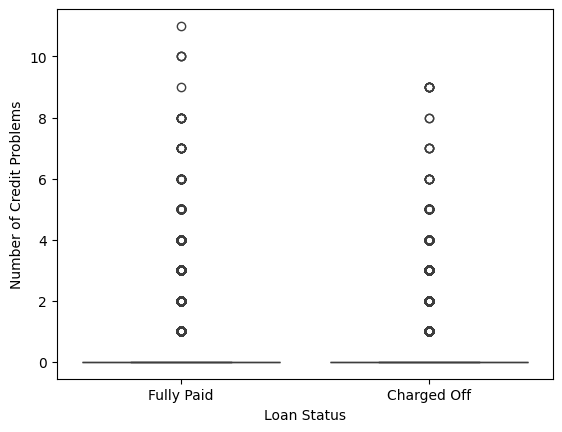

In [40]:
sns.boxplot(x='Loan Status', y='Number of Credit Problems', data=df, color='brown')
plt.show()

In [41]:
df['Number of Credit Problems'].describe()

count    205422.000000
mean          0.156283
std           0.459267
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: Number of Credit Problems, dtype: float64

In [42]:
df = df[(df['Number of Credit Problems'] < 5) | (df['Number of Credit Problems'].isna())]

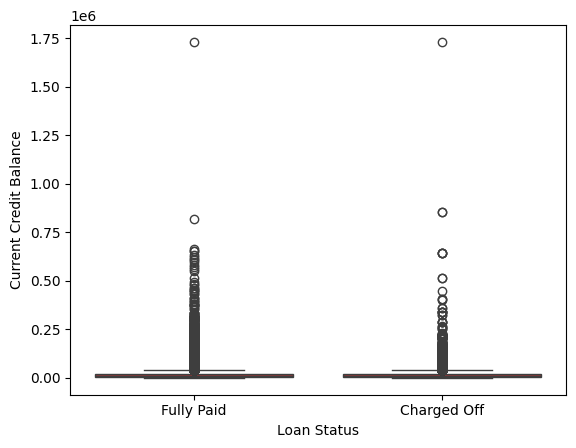

In [43]:
sns.boxplot(x='Loan Status', y='Current Credit Balance', data=df, color='brown')
plt.show()

In [44]:
df['Current Credit Balance'].describe()

count    2.052590e+05
mean     1.537746e+04
std      1.950431e+04
min      0.000000e+00
25%      5.970000e+03
50%      1.108400e+04
75%      1.929500e+04
max      1.731412e+06
Name: Current Credit Balance, dtype: float64

In [45]:
df = df[(df['Current Credit Balance'] < 500000) | (df['Current Credit Balance'].isna())]

In [46]:
df = df.drop(['Loan ID', 'Customer ID'], axis=1)

In [47]:
d = {'Fully Paid': 1, 'Charged Off': 0}

In [48]:
df['Loan Status'] = df['Loan Status'].map(d)

In [49]:
df.select_dtypes(include='object').nunique()

Term                         2
Years in current job        12
Home Ownership               4
Purpose                     10
Monthly Debt            115142
Maximum Open Credit      63998
dtype: int64

In [50]:
df['Monthly Debt'] = df['Monthly Debt'].replace(['#VALUE!'], np.nan)
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace(['#VALUE!'], np.nan)

In [51]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('[\$,]', '', regex=True).astype(float)

In [52]:
df['Monthly Debt'] = df['Monthly Debt'].fillna(df['Monthly Debt'].median())
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

In [53]:
df.select_dtypes(include='object').nunique()

Term                     2
Years in current job    12
Home Ownership           4
Purpose                 10
dtype: int64

### Feature Engineering
- Önemli gördüğümüz değerlerin hesaplama değerini arttırıldı.
- Mevcut değişkenlerden yeni, anlamlı özellikler üretildi.
- Örnekler: kredi kullanım oranı, borç/gelir oranı, hesap başına borç miktarı.
- Kategorik değişkenler (get dummies) sayısallaştırıldı.
- Amaç: modelin öngörü gücünü artırmak.

In [54]:
df['Credit Score'] = df['Credit Score'] ** 2
df['Years of Credit History'] = df['Years of Credit History'] ** 2
df['Bankruptcies'] = df['Bankruptcies'] ** 2

In [55]:
df['Dti Ratio'] = df['Monthly Debt'] / (df['Annual Income'] / 12 + 1)

In [56]:
df['Credit Utilization'] = df['Current Credit Balance'] / (df['Maximum Open Credit'] + 1)

In [57]:
df['Debt Per Account'] = df['Current Credit Balance'] / (df['Number of Open Accounts'] + 1)

In [58]:
x = df.drop('Loan Status', axis=1)

In [59]:
y = df['Loan Status']

In [60]:
x = pd.get_dummies(x, drop_first=True)

### Modelleme 

Veri setindeki eksik, hatalı ve kategorik değerler temizlendikten sonra veriler eğitim ve test olarak ikiye ayrılmıştır. Bu veri üzerinde farklı sınıflandırma algoritmaları eğitilerek performansları karşılaştırılmıştır.
Kullanılan algoritmalar: 
- Logistic Regression, 
- RandomForestClassifier, 
- GaussianNB, 
- BernoulliNB.
  
Tüm modeller accuracy, precision, recall, f1-score ve roc-auc metrikleriyle test edilmiştir. 
Böylece modellerin genel doğruluk oranları ve pozitif sınıfı (krediyi ödeyen müşteriler) yakalama başarıları objektif şekilde karşılaştırılmıştır.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
L = LogisticRegression(max_iter=2000, class_weight='balanced') 

In [65]:
L.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [66]:
tahmin_lr = L.predict(x_test)

In [67]:
acc_lr=accuracy_score(y_test, tahmin_lr)

In [68]:
prec_lr=precision_score(y_test, tahmin_lr)

In [69]:
rec_lr=recall_score(y_test, tahmin_lr)

In [70]:
f1_lr=f1_score(y_test, tahmin_lr)

In [71]:
y_proba_lr = L.predict_proba(x_test)[:,1]
auc_lr=roc_auc_score(y_test, y_proba_lr)

In [106]:
print(classification_report(y_test, tahmin_lr))

              precision    recall  f1-score   support

           0       0.39      0.54      0.45     12901
           1       0.74      0.61      0.67     28146

    accuracy                           0.59     41047
   macro avg       0.57      0.58      0.56     41047
weighted avg       0.63      0.59      0.60     41047



<Axes: >

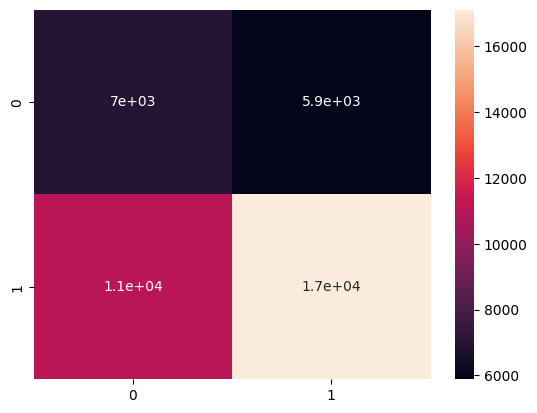

In [72]:
sns.heatmap(confusion_matrix(y_test, tahmin_lr), annot=True)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
RF = RandomForestClassifier(n_estimators=200, random_state=42) 

In [76]:
RF.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
tahmin_rf = RF.predict(x_test)

In [78]:
acc_rf  = accuracy_score(y_test, tahmin_rf)

In [79]:
prec_rf = precision_score(y_test, tahmin_rf)

In [80]:
rec_rf  = recall_score(y_test, tahmin_rf)

In [81]:
f1_rf   = f1_score(y_test, tahmin_rf)

In [82]:
y_proba_rf = RF.predict_proba(x_test)[:,1]
auc_rf = roc_auc_score(y_test, y_proba_rf)

In [83]:
print(classification_report(y_test, tahmin_rf))

              precision    recall  f1-score   support

           0       0.80      0.51      0.63     12901
           1       0.81      0.94      0.87     28146

    accuracy                           0.81     41047
   macro avg       0.81      0.73      0.75     41047
weighted avg       0.81      0.81      0.79     41047



<Axes: >

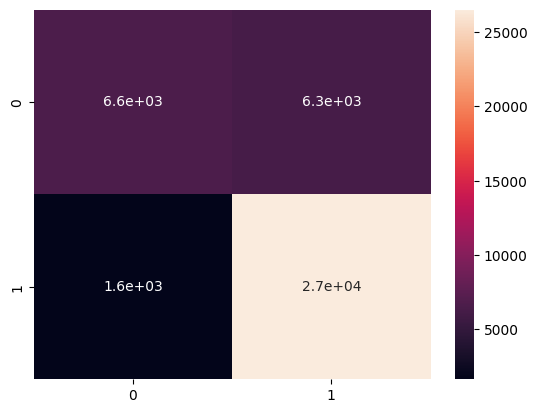

In [84]:
sns.heatmap(confusion_matrix(y_test, tahmin_rf), annot=True)

In [85]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [86]:
GNB = GaussianNB() 

In [87]:
BNB = BernoulliNB() 

In [88]:
GNB.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [89]:
tahmin_gnb = GNB.predict(x_test)

In [90]:
acc_gnb  = accuracy_score(y_test, tahmin_gnb)

In [91]:
prec_gnb = precision_score(y_test, tahmin_gnb)

In [92]:
rec_gnb  = recall_score(y_test, tahmin_gnb)

In [93]:
f1_gnb   = f1_score(y_test, tahmin_gnb)

In [94]:
auc_gnb  = roc_auc_score(y_test, GNB.predict_proba(x_test)[:,1])

In [95]:
print(classification_report(y_test, tahmin_gnb))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47     12901
           1       0.75      0.66      0.70     28146

    accuracy                           0.62     41047
   macro avg       0.59      0.60      0.59     41047
weighted avg       0.65      0.62      0.63     41047



In [96]:
BNB.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [97]:
tahmin_bnb = BNB.predict(x_test)

In [98]:
acc_bnb  = accuracy_score(y_test, tahmin_bnb)

In [99]:
prec_bnb = precision_score(y_test, tahmin_bnb)

In [100]:
rec_bnb  = recall_score(y_test, tahmin_bnb)

In [101]:
f1_bnb   = f1_score(y_test, tahmin_bnb)

In [102]:
auc_bnb  = roc_auc_score(y_test, BNB.predict_proba(x_test)[:,1])

In [103]:
print(classification_report(y_test, tahmin_bnb))

              precision    recall  f1-score   support

           0       0.53      0.15      0.24     12901
           1       0.71      0.94      0.81     28146

    accuracy                           0.69     41047
   macro avg       0.62      0.55      0.52     41047
weighted avg       0.65      0.69      0.63     41047



###  Model Değerlendirme
Modeller şu metrikler ile test edildi:  
- Recall, 
- F1-score, 
- ROC-AUC, 
- Precision,
- Accuracy.

In [104]:
results = pd.DataFrame({
    "Model": ["Linear", "RandomForestClassifier", "GaussianNB", "BernoulliNB"],
    "Accuracy":  [acc_lr,  acc_rf,  acc_gnb,  acc_bnb],
    "Precision": [prec_lr, prec_rf, prec_gnb, prec_bnb],
    "Recall":    [rec_lr,  rec_rf,  rec_gnb,  rec_bnb],
    "F1-score":  [f1_lr,   f1_rf,   f1_gnb,   f1_bnb],
    "ROC-AUC":   [auc_lr,  auc_rf,  auc_gnb,  auc_bnb]
})

print(results)

                    Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0                  Linear  0.587863   0.744204  0.607902  0.669183  0.605830
1  RandomForestClassifier  0.807733   0.808938  0.942123  0.870466  0.829558
2              GaussianNB  0.618243   0.754883  0.656399  0.702204  0.629589
3             BernoulliNB  0.691939   0.707360  0.939352  0.807014  0.622077


In [105]:
top_rf = pd.DataFrame({"f": x.columns, "imp": RF.feature_importances_}).sort_values("imp", ascending=False).head(10)["f"].tolist()
top_lr = pd.DataFrame({"f": x.columns, "coef": L.coef_[0]}).assign(abs=lambda d: d["coef"].abs()).sort_values("abs", ascending=False).head(10)["f"].tolist()

top_features = list(set(top_rf + top_lr)) 

soru_map = {
 "Annual Income":"Yıllık geliriniz nedir?",
 "Monthly Debt":"Aylık toplam borç/ödeme tutarlarınız ne kadar?",
 "Credit Score":"Güncel kredi notunuz kaç?",
 "Years in current job":"Mevcut işinizde kaç yıldır çalışıyorsunuz?",
 "Purpose":"Krediyi hangi amaçla kullanmayı planlıyorsunuz?",
 "Current Loan Amount":"Talep ettiğiniz/mevcut kredi tutarı nedir?",
 "Maximum Open Credit":"Toplam açık kredi limitiniz ne kadar?",
 "Number of Open Accounts":"Kaç aktif kredi/hesabınız var?",
 "Number of Credit Problems":"Geçmişte kredi problemi yaşadınız mı? Kaç kez?",
 "Current Credit Balance":"Toplam kredi/kredi kartı bakiyeniz ne kadar?",
 "Years of Credit History":"Kredi geçmişiniz kaç yıldır devam ediyor?"
}
for f in top_features:
    print(f,"→",soru_map.get(f,"Bu özellik için müşteriye bilgi sorulmalıdır."))

Dti Ratio → Bu özellik için müşteriye bilgi sorulmalıdır.
Home Ownership_Home Mortgage → Bu özellik için müşteriye bilgi sorulmalıdır.
Current Credit Balance → Toplam kredi/kredi kartı bakiyeniz ne kadar?
Years of Credit History → Kredi geçmişiniz kaç yıldır devam ediyor?
Purpose_other → Bu özellik için müşteriye bilgi sorulmalıdır.
Months since last delinquent → Bu özellik için müşteriye bilgi sorulmalıdır.
Maximum Open Credit → Toplam açık kredi limitiniz ne kadar?
Home Ownership_Rent → Bu özellik için müşteriye bilgi sorulmalıdır.
Debt Per Account → Bu özellik için müşteriye bilgi sorulmalıdır.
Annual Income → Yıllık geliriniz nedir?
Term_Short Term → Bu özellik için müşteriye bilgi sorulmalıdır.
Bankruptcies → Bu özellik için müşteriye bilgi sorulmalıdır.
Years in current job_10+ years → Bu özellik için müşteriye bilgi sorulmalıdır.
Number of Open Accounts → Kaç aktif kredi/hesabınız var?
Number of Credit Problems → Geçmişte kredi problemi yaşadınız mı? Kaç kez?
Monthly Debt → Aylı